In [55]:
import os
os.chdir("/diazlab/data3/.abhinav/projects/SHH/Visium/3rd_strict_cutoff/python/")
import importlib
import preprocessing
importlib.reload(preprocessing)

<module 'preprocessing' from '/diazlab/data3/.abhinav/projects/SHH/Visium/3rd_strict_cutoff/python/preprocessing.py'>

#cells after MT filter: 580
#genes after min cells filter: 10488


/diazlab/data3/.abhinav/tools/miniconda3/envs/spatial_analysis/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


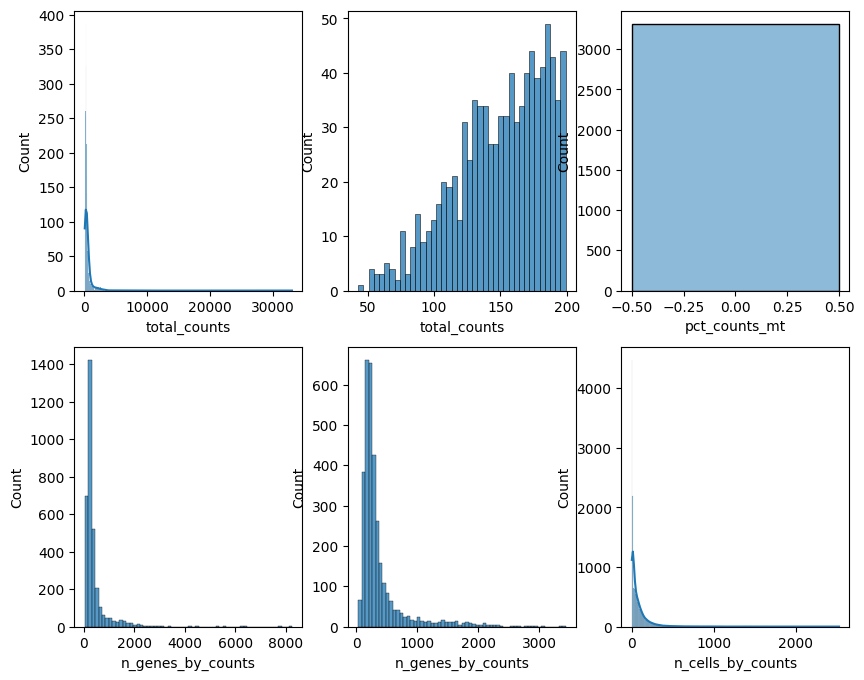

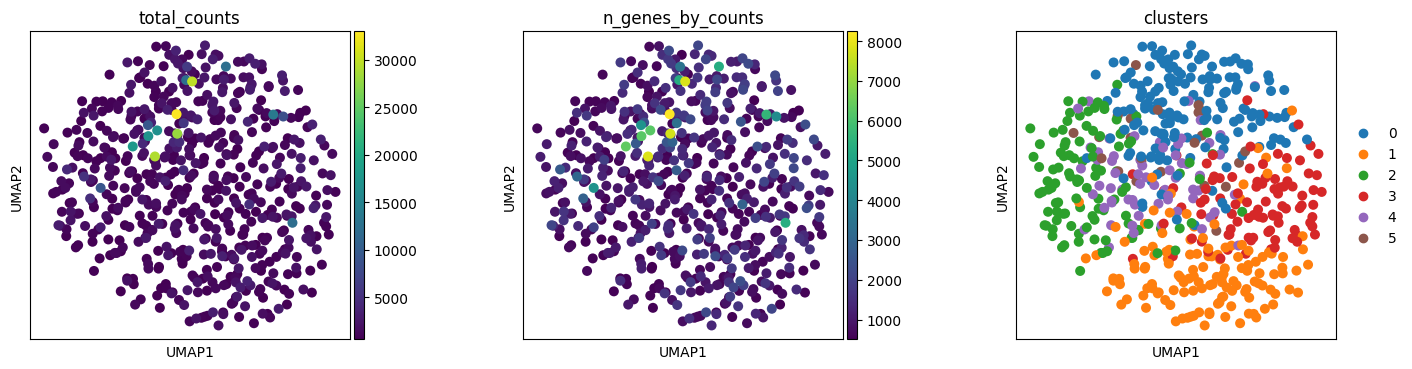

<Figure size 400x400 with 0 Axes>

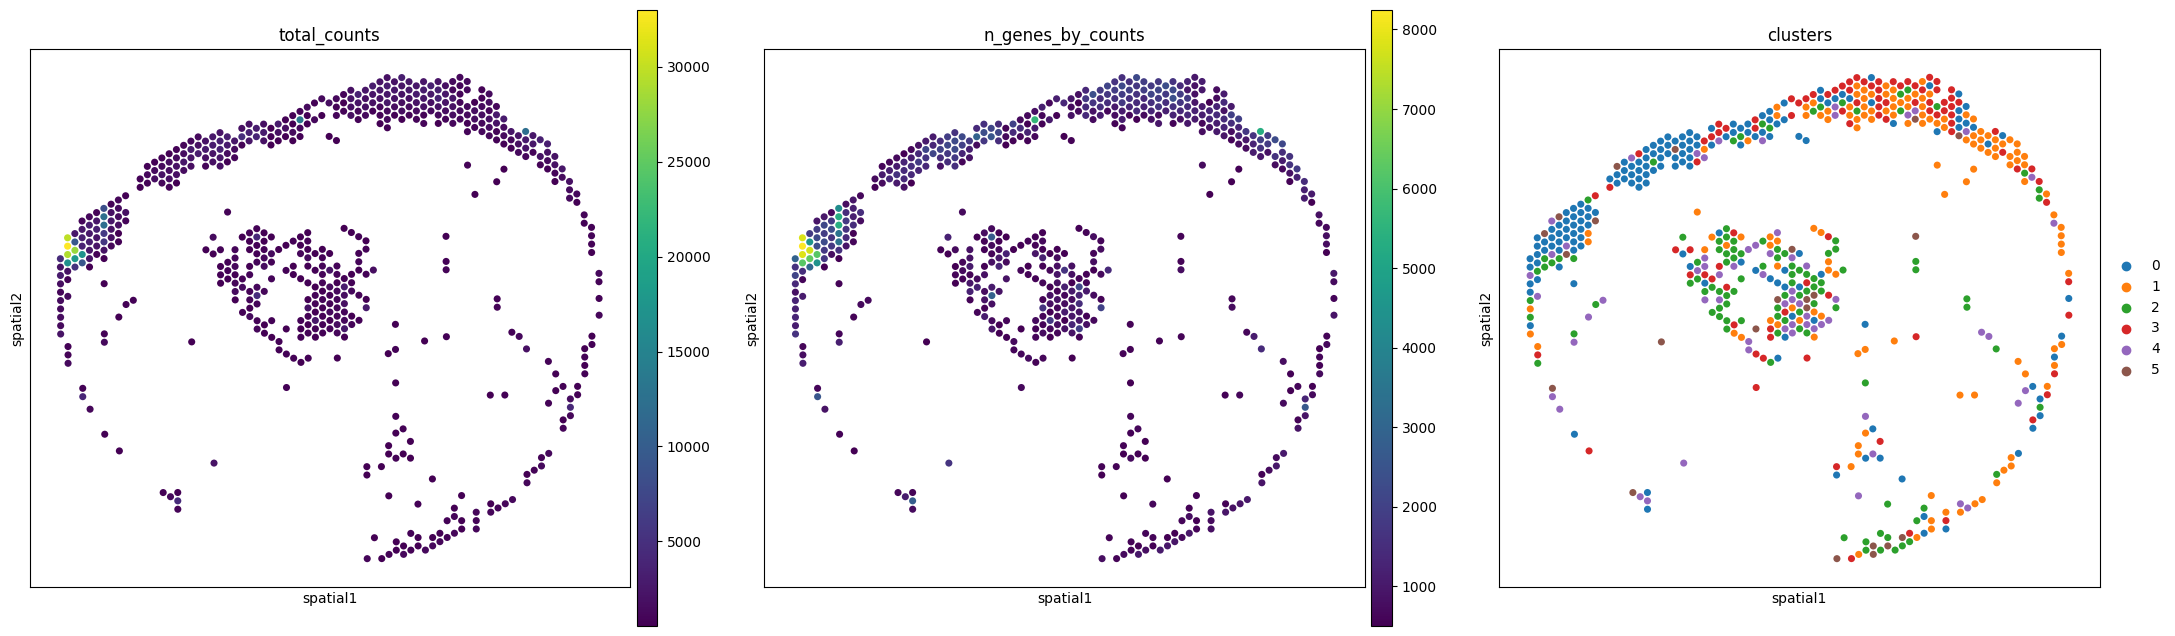

<Figure size 800x800 with 0 Axes>

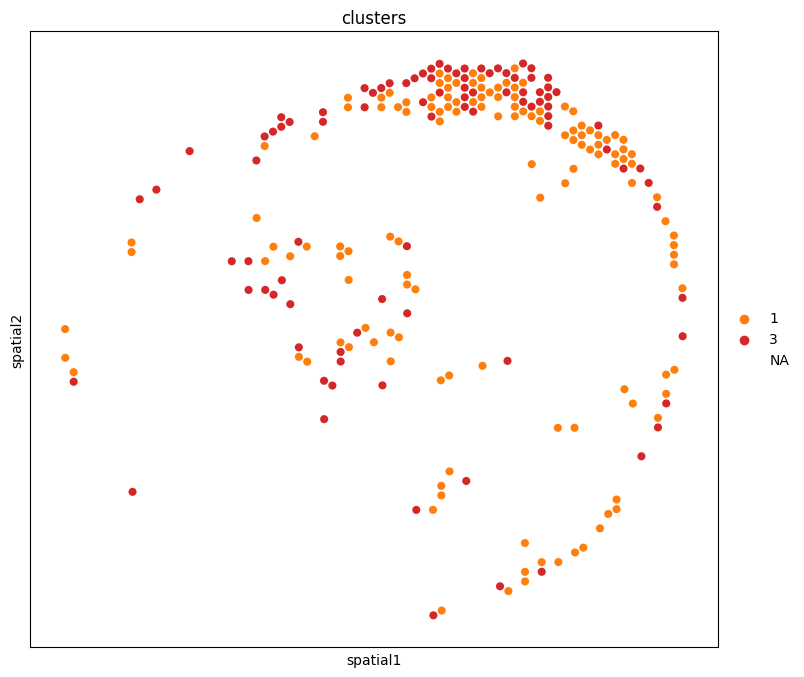

<Figure size 1000x800 with 0 Axes>

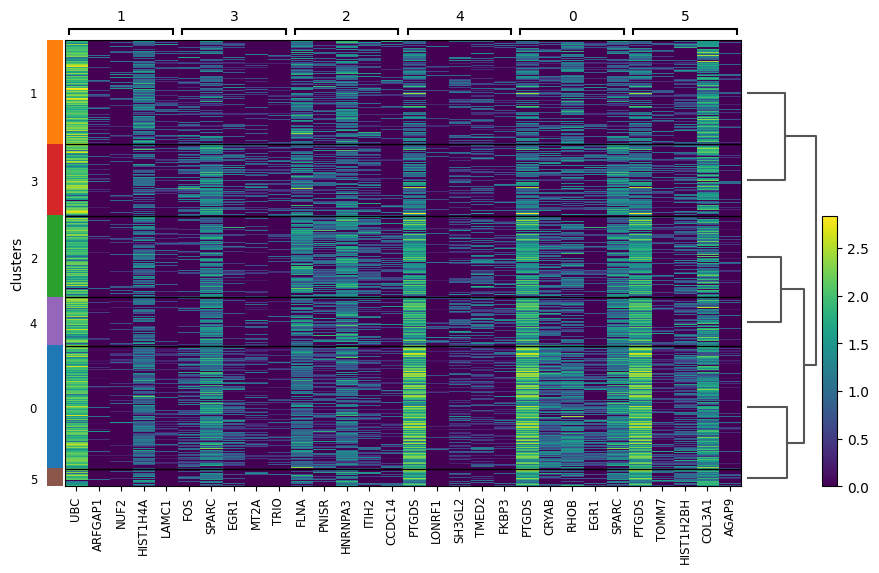

<Figure size 1000x800 with 0 Axes>

In [53]:
# List of file names (just the base names without the path)
file_names = [
    "SHH_SF03521.h5ad", "SHH_SF07994.h5ad", "SHH_SF08539.h5ad",
    "SHH_SF09782.h5ad", "SHH_SF10067.h5ad", "SHH_SF10210.h5ad", 
    "SHH_SF12434.h5ad"
]

# Define the paths for input files and output directory
input_dir = "/diazlab/data3/.abhinav/projects/SHH/Visium/scanpy/"
output_dir = "/diazlab/data3/.abhinav/projects/SHH/Visium/3rd_strict_cutoff/python/"

# Loop over each file in the list
for file_name in file_names:
    input_file = input_dir + file_name
    output_prefix = file_name.replace(".h5ad", "")  # Remove file extension to use as output prefix

    # Call your function for each file
    processed_data = preprocessing.process_and_visualize_data(input_file, output_dir, output_prefix)

    # Optionally, you can save or further process each `processed_data` result


Cells after min genes > 500 and MT filter < 20 filter: 1563


/diazlab/data3/.abhinav/tools/miniconda3/envs/spatial_analysis/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


Genes after min cells filter = 10: 11265


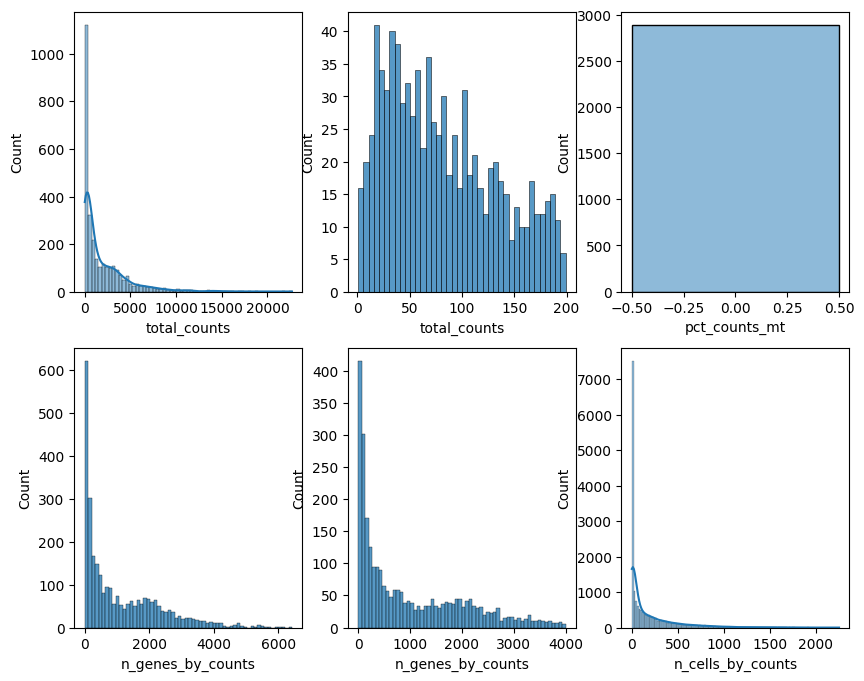

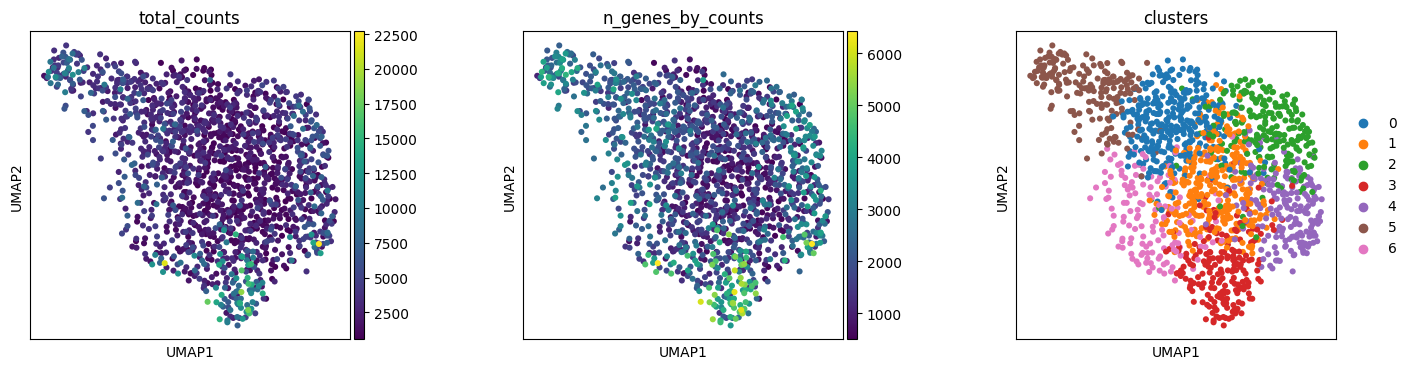

<Figure size 400x400 with 0 Axes>

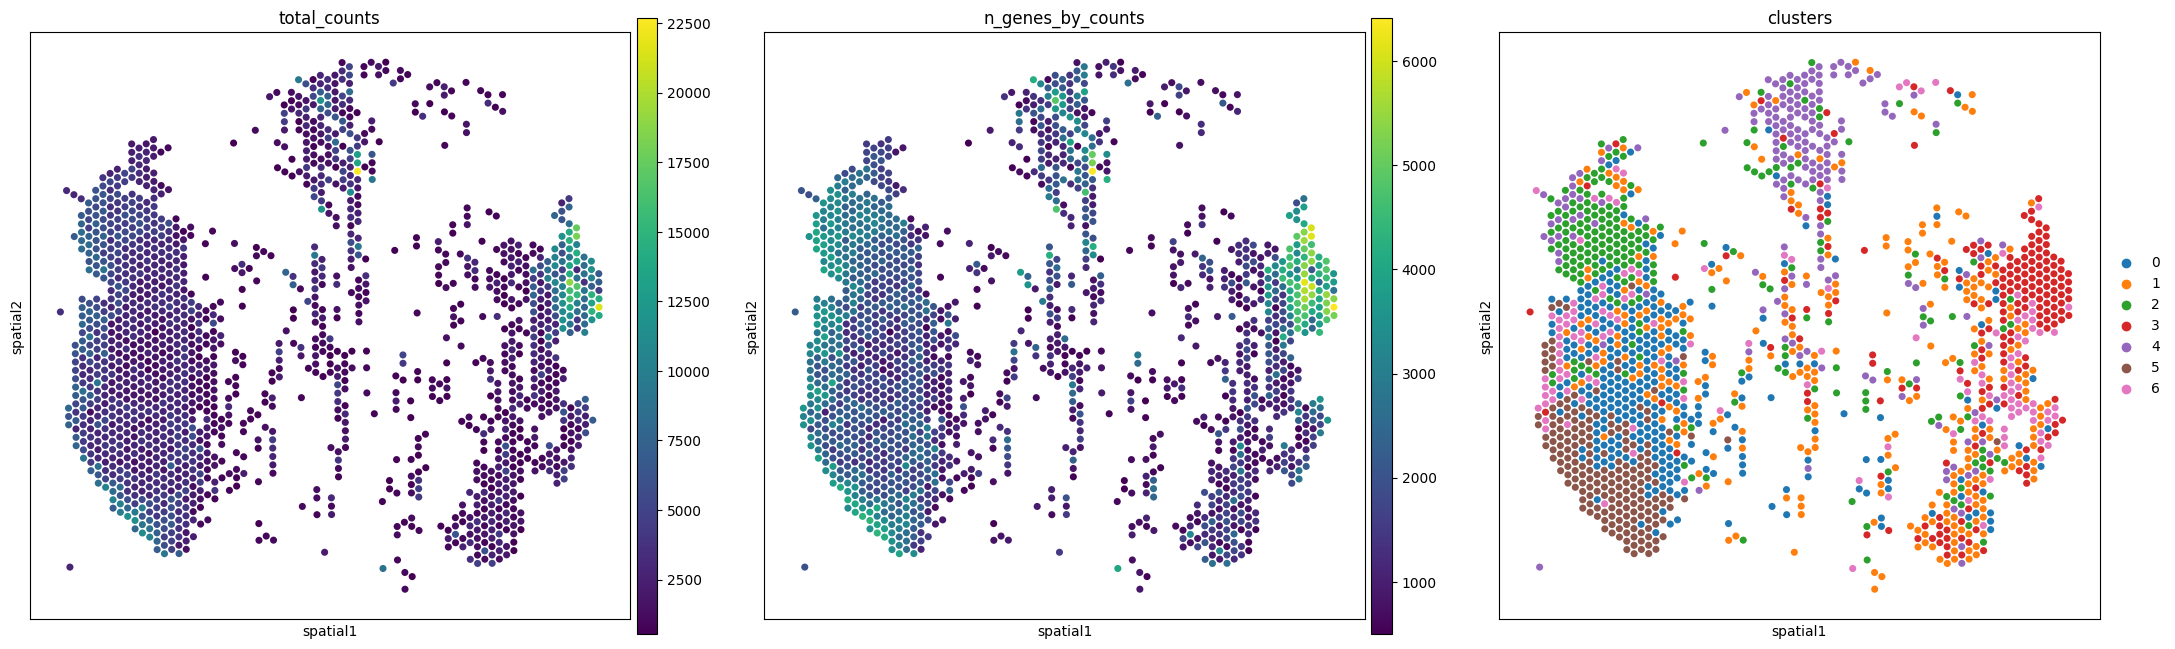

<Figure size 800x800 with 0 Axes>

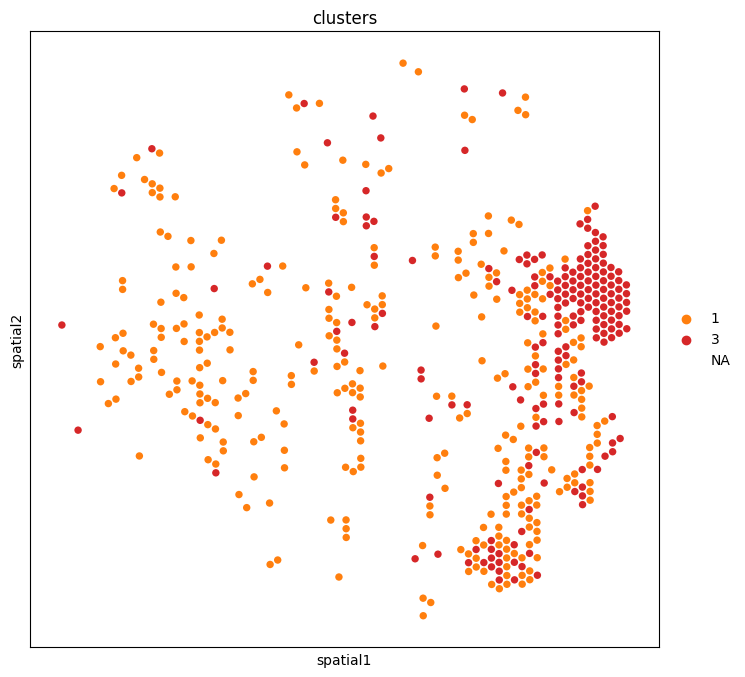

<Figure size 1000x800 with 0 Axes>

In [56]:
SHH_SF03521 = preprocessing.process_and_visualize_data("/diazlab/data3/.abhinav/projects/SHH/Visium/scanpy/SHH_SF03521.h5ad",
                                                       "/diazlab/data3/.abhinav/projects/SHH/Visium/3rd_strict_cutoff/python/",
                                                       "SHH_SF03521")